In [ ]:
import os
os.environ['KAGGLE_USERNAME']="KAGGLE_USERNAME"
os.environ['KAGGLE_KEY']="KAGGLE_KEY"
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip cell-images-for-detecting-malaria

In [ ]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential


In [ ]:

import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code.
np.random.seed(1000)

#import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image


image_directory = 'cell_images/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

print(len(dataset))
print(len(label))

27558
27558


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Input

model = Sequential()

# Define INPUT_SHAPE here
SIZE = 64
INPUT_SHAPE = (SIZE, SIZE, 3)

model.add(Input(shape=INPUT_SHAPE))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0

In [ ]:

history = model.fit(np.array(X_train),
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 10,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


Epoch 1/10
311/311 [==============================] - 11s 13ms/step - loss: 0.4072 - accuracy: 0.8278 - val_loss: 0.7527 - val_accuracy: 0.8222
Epoch 2/10
311/311 [==============================] - 4s 12ms/step - loss: 0.2206 - accuracy: 0.9206 - val_loss: 0.2242 - val_accuracy: 0.9234
Epoch 3/10
311/311 [==============================] - 4s 12ms/step - loss: 0.1876 - accuracy: 0.9339 - val_loss: 0.2286 - val_accuracy: 0.9311
Epoch 4/10
311/311 [==============================] - 4s 11ms/step - loss: 0.1622 - accuracy: 0.9431 - val_loss: 0.2798 - val_accuracy: 0.8998
Epoch 5/10
311/311 [==============================] - 4s 11ms/step - loss: 0.1388 - accuracy: 0.9516 - val_loss: 0.2606 - val_accuracy: 0.9057
Epoch 6/10
311/311 [==============================] - 4s 12ms/step - loss: 0.1197 - accuracy: 0.9574 - val_loss: 0.3309 - val_accuracy: 0.8435
Epoch 7/10
311/311 [==============================] - 4s 11ms/step - loss: 0.1033 - accuracy: 0.9642 - val_loss: 0.1546 - val_accuracy: 0.945

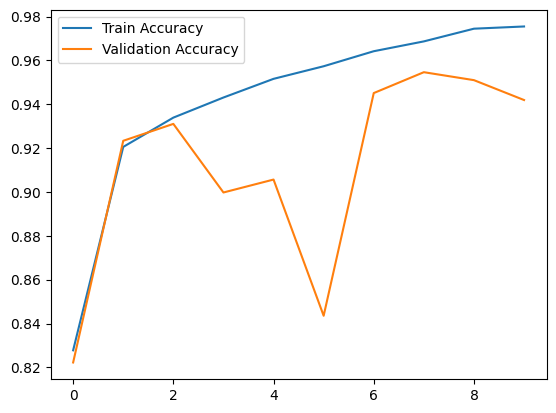

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()


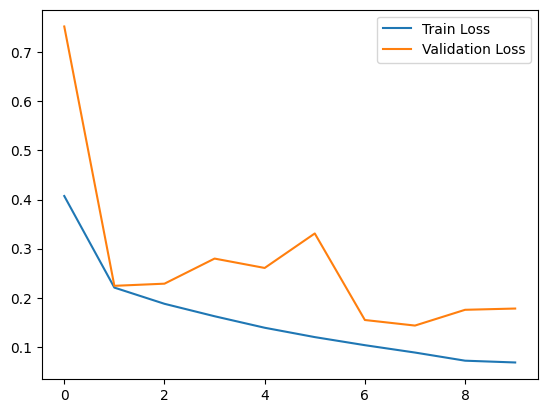

In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()